# WeatherPy

__*Importing Dependencies And Keys*__

In [1]:
# Dependencies
import json
import requests as req
import pandas as pd
import numpy as np
from config import gkey, wkey
from citipy import citipy
import time
import matplotlib.pyplot as plt

__*Creating Dataframe of Random Cities*__

In [2]:

# DF for randomly generated lat and long
location_data = pd.DataFrame()
location_data['rand_lat'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['rand_lng'] = [np.random.uniform(-180, 180) for x in range(1500)]

# add closest city and country column
location_data['nearest_city'] = ""
location_data['country'] = ""

#find and add closest city and country code
for index, row in location_data.iterrows():
    lat = row['rand_lat']
    lng = row['rand_lng']
    location_data.set_value(index, 'nearest_city', citipy.nearest_city(lat, lng).city_name)
    location_data.set_value(index, 'country', citipy.nearest_city(lat, lng).country_code)

/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [3]:
location_data.head()

,rand_lat,rand_lng,nearest_city,country
0,73.023262,26.810403,kjollefjord,no
1,-64.439359,-60.902531,ushuaia,ar
2,73.391436,-103.704868,yellowknife,ca
3,62.762799,170.941489,kamenskoye,ru
4,-26.617823,-45.434049,guaruja,br


__*Deleting Repitition and N/A*__

In [4]:
# delete repeated cities and find unique city count
location_data = location_data.dropna()

#rename columnds for later merging
location_data = location_data.rename(columns = {'nearest_city': 'City',
                                                'rand_lat': 'Latitude',
                                                'rand_lng': 'Longitude',
                                                'country': 'Country'})

In [5]:
location_data.head()

,Latitude,Longitude,City,Country
0,73.023262,26.810403,kjollefjord,no
1,-64.439359,-60.902531,ushuaia,ar
2,73.391436,-103.704868,yellowknife,ca
3,62.762799,170.941489,kamenskoye,ru
4,-26.617823,-45.434049,guaruja,br


In [6]:
counter = 0
location_data["Humidity"] = ""
location_data["Wind Speed"] = ""
location_data["Temperature"] = ""
location_data["Cloudiness"] = ""

In [7]:
location_data.head()

,Latitude,Longitude,City,Country,Humidity,Wind Speed,Temperature,Cloudiness
0,73.023262,26.810403,kjollefjord,no,,,,
1,-64.439359,-60.902531,ushuaia,ar,,,,
2,73.391436,-103.704868,yellowknife,ca,,,,
3,62.762799,170.941489,kamenskoye,ru,,,,
4,-26.617823,-45.434049,guaruja,br,,,,


In [8]:
# Loop through and get the weather data using the Open Weather API.# Loop t 
print("Beginning Data Retrieval")
print("-----------------------------------")
for index, row in location_data.iterrows():
  #Open weather url.
    url = "https://api.openweathermap.org/data/2.5/weather?"
    #units = "Imperial"
    query_url = url + "lat=" + str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + wkey
    
    print(f"Processing Record {counter} | {row['City']}")
    print(query_url)
    counter += 1
    weather = req.get(query_url).json()
    #print(weather)
    try:
        temperature = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        
        location_data.set_value(index, "Temperature", temperature)
        location_data.set_value(index,"Humidity", humidity)
        location_data.set_value(index,"Cloudiness", cloudiness)
        location_data.set_value(index,"Wind Speed", wind_speed)
        
    except KeyError: 'main'
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
-----------------------------------
Processing Record 0 | kjollefjord
https://api.openweathermap.org/data/2.5/weather?lat=73.0232616613014&lon=26.810402679523747&appid=feb3a00c4642541ed7a27c4fc4f47f48


/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record 1 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-64.43935939391494&lon=-60.90253059825959&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 2 | yellowknife
https://api.openweathermap.org/data/2.5/weather?lat=73.39143580388509&lon=-103.70486757710577&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 3 | kamenskoye
https://api.openweathermap.org/data/2.5/weather?lat=62.762798803695034&lon=170.94148868430784&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 4 | guaruja
https://api.openweathermap.org/data/2.5/weather?lat=-26.61782338693083&lon=-45.43404855925786&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 5 | barentsburg
https://api.openweathermap.org/data/2.5/weather?lat=86.22204295388642&lon=9.512646046305491&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 6 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?lat=-9.136292924708954&lon=71.33175358639465&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing R

Processing Record 51 | belushya guba
https://api.openweathermap.org/data/2.5/weather?lat=78.72188479935787&lon=48.61999102475511&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 52 | powell river
https://api.openweathermap.org/data/2.5/weather?lat=51.76417258997756&lon=-124.46400088063737&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 53 | takaungu
https://api.openweathermap.org/data/2.5/weather?lat=-3.6991188043108423&lon=40.29065343854643&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 54 | deputatskiy
https://api.openweathermap.org/data/2.5/weather?lat=75.91532144833997&lon=141.6027202274239&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 55 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-74.8373683804632&lon=-107.69404574947222&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 56 | santa barbara
https://api.openweathermap.org/data/2.5/weather?lat=34.220502792193216&lon=-119.67472636929922&appid=feb3a00c4642541ed7a27c4fc

Processing Record 101 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?lat=89.68148276295847&lon=149.75193221449433&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 102 | kodiak
https://api.openweathermap.org/data/2.5/weather?lat=48.03463776001084&lon=-155.60797522696953&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 103 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-88.33579399654224&lon=-4.939612006989535&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 104 | hilo
https://api.openweathermap.org/data/2.5/weather?lat=6.728445764386791&lon=-145.10232782415125&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 105 | bluff
https://api.openweathermap.org/data/2.5/weather?lat=-86.54827657722734&lon=156.29262497682743&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 106 | upernavik
https://api.openweathermap.org/data/2.5/weather?lat=79.0764500812405&lon=-58.99433258584341&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Re

Processing Record 151 | tazovskiy
https://api.openweathermap.org/data/2.5/weather?lat=69.50758880197202&lon=77.97290287468985&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 152 | grand river south east
https://api.openweathermap.org/data/2.5/weather?lat=-21.268649578629663&lon=62.765347479204934&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 153 | tutoia
https://api.openweathermap.org/data/2.5/weather?lat=-2.4053147551403953&lon=-41.93618001519417&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 154 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?lat=-71.43368564366637&lon=16.479376112306824&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 155 | nguru
https://api.openweathermap.org/data/2.5/weather?lat=12.55358824991788&lon=10.530549327126351&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 156 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?lat=82.91702560403994&lon=25.036848680799068&appid=feb3a00c4642541ed7a27c4

Processing Record 201 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?lat=32.70466460775435&lon=179.6895498799762&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 202 | brokopondo
https://api.openweathermap.org/data/2.5/weather?lat=3.7902699480271025&lon=-56.056082063629745&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 203 | goderich
https://api.openweathermap.org/data/2.5/weather?lat=1.1913950494631536&lon=-23.989009497382114&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 204 | mys shmidta
https://api.openweathermap.org/data/2.5/weather?lat=86.89250088669507&lon=-179.15978966591192&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 205 | cape town
https://api.openweathermap.org/data/2.5/weather?lat=-70.18359504414931&lon=-6.02613655798487&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 206 | mataura
https://api.openweathermap.org/data/2.5/weather?lat=-24.56725319084046&lon=-144.10330998058686&appid=feb3a00c4642541ed7a27c4fc4f47f

Processing Record 251 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-80.78653978036895&lon=9.245935433084526&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 252 | mahebourg
https://api.openweathermap.org/data/2.5/weather?lat=-41.27418311827715&lon=70.55993017897373&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 253 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-27.866561900118597&lon=-105.95863622266634&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 254 | pringsewu
https://api.openweathermap.org/data/2.5/weather?lat=-5.0043670176589075&lon=104.57710758687938&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 255 | leningradskiy
https://api.openweathermap.org/data/2.5/weather?lat=80.46935173902895&lon=176.0492231821574&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 256 | bristol
https://api.openweathermap.org/data/2.5/weather?lat=36.69727701431073&lon=-82.31966328599997&appid=feb3a00c4642541ed7a27c4fc4f47f48
P

Processing Record 301 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-58.56127998645273&lon=98.47472506595562&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 302 | atuona
https://api.openweathermap.org/data/2.5/weather?lat=10.187995922819184&lon=-130.23420689843425&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 303 | samusu
https://api.openweathermap.org/data/2.5/weather?lat=0.37781832855672803&lon=-162.6360276842252&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 304 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?lat=33.6447425026078&lon=175.0362662102574&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 305 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-47.581494606055294&lon=-133.41554024313623&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 306 | lebu
https://api.openweathermap.org/data/2.5/weather?lat=-29.905758618969095&lon=-95.49604392935595&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processin

Processing Record 351 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-82.52204038231217&lon=7.255958666308317&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 352 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-71.74381817507211&lon=-119.60984048116379&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 353 | fortuna
https://api.openweathermap.org/data/2.5/weather?lat=37.23795540397843&lon=-137.93525326007807&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 354 | acapulco
https://api.openweathermap.org/data/2.5/weather?lat=5.188260103068274&lon=-104.85352332176494&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 355 | marawi
https://api.openweathermap.org/data/2.5/weather?lat=20.669286647700915&lon=29.204926434333203&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 356 | kismayo
https://api.openweathermap.org/data/2.5/weather?lat=-0.34566593316519345&lon=42.074696327963466&appid=feb3a00c4642541ed7a27c4fc4f47f48
Process

Processing Record 401 | ketchikan
https://api.openweathermap.org/data/2.5/weather?lat=57.98250667885114&lon=-129.31651860089835&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 402 | belaya gora
https://api.openweathermap.org/data/2.5/weather?lat=69.19499375539749&lon=147.42805816220016&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 403 | katangli
https://api.openweathermap.org/data/2.5/weather?lat=51.7358649304023&lon=144.47721994054666&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 404 | tarudant
https://api.openweathermap.org/data/2.5/weather?lat=29.915134784009524&lon=-8.125846900156318&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 405 | andevoranto
https://api.openweathermap.org/data/2.5/weather?lat=-19.831814500949932&lon=50.766667075079255&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 406 | kloulklubed
https://api.openweathermap.org/data/2.5/weather?lat=5.446100733190974&lon=133.16889003126124&appid=feb3a00c4642541ed7a27c4fc4f47f

Processing Record 451 | imphal
https://api.openweathermap.org/data/2.5/weather?lat=25.091852053805354&lon=93.90268205393437&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 452 | thompson
https://api.openweathermap.org/data/2.5/weather?lat=66.80992307721303&lon=-100.79377999014683&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 453 | dzhusaly
https://api.openweathermap.org/data/2.5/weather?lat=43.30748117843035&lon=63.08223768596366&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 454 | ancud
https://api.openweathermap.org/data/2.5/weather?lat=-38.789426689372895&lon=-99.75060410312405&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 455 | barrow
https://api.openweathermap.org/data/2.5/weather?lat=69.54565196937025&lon=-156.26723074966378&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 456 | vaini
https://api.openweathermap.org/data/2.5/weather?lat=-81.09093555920073&lon=-179.58459840044256&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Reco

Processing Record 501 | nizhneyansk
https://api.openweathermap.org/data/2.5/weather?lat=74.3822394670799&lon=136.1221984061783&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 502 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=80.18085553337283&lon=-23.14194319764988&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 503 | hilo
https://api.openweathermap.org/data/2.5/weather?lat=6.935913924604947&lon=-162.13308886748655&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 504 | avarua
https://api.openweathermap.org/data/2.5/weather?lat=-40.80755975072986&lon=-159.8613892263853&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 505 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?lat=-39.40672483304981&lon=26.604069158272324&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 506 | cherskiy
https://api.openweathermap.org/data/2.5/weather?lat=89.78232696265522&lon=162.02280575313836&appid=feb3a00c4642541ed7a27c4fc4f47f4

Processing Record 551 | palabuhanratu
https://api.openweathermap.org/data/2.5/weather?lat=-16.872340450192297&lon=102.54352690802443&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 552 | tsihombe
https://api.openweathermap.org/data/2.5/weather?lat=-56.97169759698672&lon=49.532141365056845&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 553 | plettenberg bay
https://api.openweathermap.org/data/2.5/weather?lat=-44.94309379731372&lon=24.093952374731998&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 554 | kuche
https://api.openweathermap.org/data/2.5/weather?lat=43.16573684986193&lon=83.45947935696233&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 555 | great yarmouth
https://api.openweathermap.org/data/2.5/weather?lat=55.11546458892414&lon=2.369956033705563&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 556 | sur
https://api.openweathermap.org/data/2.5/weather?lat=20.837641580654406&lon=61.016890522342834&appid=feb3a00c4642541ed7a27c4fc4f47f

Processing Record 601 | marquette
https://api.openweathermap.org/data/2.5/weather?lat=47.17163495741397&lon=-87.14789106988053&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 602 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-74.62279572603771&lon=-37.60880106773055&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 603 | amga
https://api.openweathermap.org/data/2.5/weather?lat=61.0724719881068&lon=132.0284006021559&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 604 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=-5.614352036843684&lon=-98.89499084815895&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 605 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?lat=-45.59740189161584&lon=-22.541911855798844&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 606 | nizhneyansk
https://api.openweathermap.org/data/2.5/weather?lat=81.51128169672702&lon=140.26750294804793&appid=feb3a00c4642541ed7a27c4fc4f47f4

Processing Record 651 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?lat=18.40734184096955&lon=-111.6102846512911&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 652 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-74.28716617086152&lon=84.34319231971301&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 653 | hervey bay
https://api.openweathermap.org/data/2.5/weather?lat=-21.792616234066855&lon=156.29350220454234&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 654 | bengkulu
https://api.openweathermap.org/data/2.5/weather?lat=-8.32541681455018&lon=100.1995826839368&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 655 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-37.914397141860576&lon=-128.80937220405718&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 656 | mahebourg
https://api.openweathermap.org/data/2.5/weather?lat=-48.95161020402431&lon=79.26257820928936&appid=feb3a00c4642541ed7a27c4fc4f47f

Processing Record 701 | cape town
https://api.openweathermap.org/data/2.5/weather?lat=-57.08486032976809&lon=-10.269575252167215&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 702 | jamestown
https://api.openweathermap.org/data/2.5/weather?lat=-18.22977308840629&lon=2.721074391732003&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 703 | mao
https://api.openweathermap.org/data/2.5/weather?lat=15.557225320542344&lon=15.851692540884699&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 704 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?lat=1.038532089848573&lon=-94.47626401823938&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 705 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-78.69761227710167&lon=-136.6644760864893&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 706 | port alfred
https://api.openweathermap.org/data/2.5/weather?lat=-70.88280708729005&lon=36.99987443641294&appid=feb3a00c4642541ed7a27c4fc4f47f48
Pro

Processing Record 751 | chagda
https://api.openweathermap.org/data/2.5/weather?lat=57.885580433283366&lon=129.45150543395084&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 752 | nokaneng
https://api.openweathermap.org/data/2.5/weather?lat=-19.697649286446875&lon=22.823550085327952&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 753 | dikson
https://api.openweathermap.org/data/2.5/weather?lat=89.32303063511515&lon=77.68751967286624&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 754 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-79.8408346620309&lon=78.88682282439123&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 755 | tsihombe
https://api.openweathermap.org/data/2.5/weather?lat=-55.00597769539108&lon=51.358221976839246&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 756 | henties bay
https://api.openweathermap.org/data/2.5/weather?lat=-22.18712544609538&lon=7.563082073766964&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processi

Processing Record 801 | barrow
https://api.openweathermap.org/data/2.5/weather?lat=78.36829660359555&lon=-149.09288261135964&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 802 | thompson
https://api.openweathermap.org/data/2.5/weather?lat=71.67555197473217&lon=-96.43544408477399&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 803 | kastamonu
https://api.openweathermap.org/data/2.5/weather?lat=41.81779454392057&lon=33.66436909930124&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 804 | belushya guba
https://api.openweathermap.org/data/2.5/weather?lat=82.94092183427892&lon=56.76480030032383&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 805 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-52.87939226398713&lon=111.6822104379392&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 806 | sanmenxia
https://api.openweathermap.org/data/2.5/weather?lat=34.61962211138359&lon=110.8150799431433&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processin

Processing Record 851 | kodiak
https://api.openweathermap.org/data/2.5/weather?lat=39.42138422027989&lon=-151.893374330754&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 852 | lebu
https://api.openweathermap.org/data/2.5/weather?lat=-34.636306961280205&lon=-101.8309579925331&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 853 | hobart
https://api.openweathermap.org/data/2.5/weather?lat=-41.997747133969106&lon=153.93984748071563&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 854 | cascais
https://api.openweathermap.org/data/2.5/weather?lat=37.43155709802484&lon=-12.008876875526482&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 855 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?lat=-5.592136594970071&lon=66.14280388722256&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 856 | chapais
https://api.openweathermap.org/data/2.5/weather?lat=54.64696291820255&lon=-75.68638764729174&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Reco

Processing Record 901 | abu jubayhah
https://api.openweathermap.org/data/2.5/weather?lat=11.439485319244866&lon=32.09306663502619&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 902 | taolanaro
https://api.openweathermap.org/data/2.5/weather?lat=-55.357992820341046&lon=53.457812639635705&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 903 | te anau
https://api.openweathermap.org/data/2.5/weather?lat=-40.51514205965861&lon=161.15864603308114&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 904 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?lat=78.88125853694649&lon=-83.08452172603363&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 905 | dharangaon
https://api.openweathermap.org/data/2.5/weather?lat=21.07357839289125&lon=75.40435935485377&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 906 | sao filipe
https://api.openweathermap.org/data/2.5/weather?lat=10.32894605364966&lon=-33.445722853971915&appid=feb3a00c4642541ed7a27c4fc4f47f48


Processing Record 951 | gbadolite
https://api.openweathermap.org/data/2.5/weather?lat=4.0758678483734485&lon=20.49367996170517&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 952 | new norfolk
https://api.openweathermap.org/data/2.5/weather?lat=-72.27917824056452&lon=125.54618782895488&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 953 | busselton
https://api.openweathermap.org/data/2.5/weather?lat=-70.07617351512846&lon=94.72649678027591&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 954 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-54.90633750271247&lon=122.14219218237463&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 955 | constitucion
https://api.openweathermap.org/data/2.5/weather?lat=12.247421666473628&lon=-127.8668751526308&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 956 | chagda
https://api.openweathermap.org/data/2.5/weather?lat=58.133783221011385&lon=132.1320991505812&appid=feb3a00c4642541ed7a27c4fc4f47f48
Pr

Processing Record 1001 | tasiilaq
https://api.openweathermap.org/data/2.5/weather?lat=72.18016367844984&lon=-34.797078952272386&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1002 | amderma
https://api.openweathermap.org/data/2.5/weather?lat=81.69738384180238&lon=61.69938180413402&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1003 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-63.59633496382854&lon=6.9311543582429636&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1004 | codrington
https://api.openweathermap.org/data/2.5/weather?lat=26.146802594978297&lon=-44.593112993267965&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1005 | barrow
https://api.openweathermap.org/data/2.5/weather?lat=79.93107167948185&lon=-157.71570325720847&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1006 | nuuk
https://api.openweathermap.org/data/2.5/weather?lat=60.970147829499325&lon=-53.56825768242065&appid=feb3a00c4642541ed7a27c4fc4f47f48
Proc

Processing Record 1051 | kapaa
https://api.openweathermap.org/data/2.5/weather?lat=32.180520521354225&lon=-163.14489979360945&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1052 | grand river south east
https://api.openweathermap.org/data/2.5/weather?lat=-24.86137287208743&lon=80.0066675219154&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1053 | port alfred
https://api.openweathermap.org/data/2.5/weather?lat=-86.02996739882086&lon=41.18475035369761&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1054 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=74.5074185026979&lon=-29.0885483562476&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1055 | road town
https://api.openweathermap.org/data/2.5/weather?lat=22.364359348411213&lon=-64.51851997643284&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1056 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-11.51166688124178&lon=-119.59102678878344&appid=feb3a00c46425

Processing Record 1100 | champerico
https://api.openweathermap.org/data/2.5/weather?lat=7.57966642508687&lon=-93.98218908789633&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1101 | galesong
https://api.openweathermap.org/data/2.5/weather?lat=-5.3614355753203&lon=117.01989957479606&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1102 | albany
https://api.openweathermap.org/data/2.5/weather?lat=-89.61574387428675&lon=91.21539177436415&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1103 | ponta do sol
https://api.openweathermap.org/data/2.5/weather?lat=14.457805606506497&lon=-38.65994056004746&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1104 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-86.55302783072489&lon=-127.27349632481591&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1105 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-69.54972205447342&lon=-75.80064334385837&appid=feb3a00c4642541ed7a27c4fc4f47f48


Processing Record 1149 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=79.17030822349011&lon=-21.73476430857525&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1150 | kavaratti
https://api.openweathermap.org/data/2.5/weather?lat=13.037753163466292&lon=67.40596998085573&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1151 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-64.5203003263414&lon=-84.1786678558992&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1152 | iqaluit
https://api.openweathermap.org/data/2.5/weather?lat=58.161790516391704&lon=-73.19002458601528&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1153 | makubetsu
https://api.openweathermap.org/data/2.5/weather?lat=45.02779812685927&lon=141.65777808097204&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1154 | burica
https://api.openweathermap.org/data/2.5/weather?lat=4.181313862993846&lon=-82.60852580397298&appid=feb3a00c4642541ed7a27c4fc4

Processing Record 1198 | avarua
https://api.openweathermap.org/data/2.5/weather?lat=-62.33068411718067&lon=-167.243146779323&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1199 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-87.29647359449035&lon=-107.13910305281969&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1200 | taolanaro
https://api.openweathermap.org/data/2.5/weather?lat=-69.51912865795315&lon=63.171905171679555&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1201 | soderhamn
https://api.openweathermap.org/data/2.5/weather?lat=61.30954834906751&lon=18.41317799081213&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1202 | mar del plata
https://api.openweathermap.org/data/2.5/weather?lat=-49.44385372645396&lon=-47.96331550048194&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1203 | srednekolymsk
https://api.openweathermap.org/data/2.5/weather?lat=67.64149240613463&lon=156.71499776303364&appid=feb3a00c4642541ed7a2

Processing Record 1247 | yellowknife
https://api.openweathermap.org/data/2.5/weather?lat=80.83422464169422&lon=-112.38739404307523&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1248 | dunedin
https://api.openweathermap.org/data/2.5/weather?lat=-54.264531627502976&lon=176.03163636106893&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1249 | shatrovo
https://api.openweathermap.org/data/2.5/weather?lat=56.294849041490295&lon=64.54238088069292&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1250 | coquimbo
https://api.openweathermap.org/data/2.5/weather?lat=-30.446758971853903&lon=-73.47573685805047&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1251 | abalak
https://api.openweathermap.org/data/2.5/weather?lat=16.316822461314786&lon=7.009822469914724&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1252 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-75.50279084333235&lon=-51.850828709754865&appid=feb3a00c4642541ed7a27c4fc4f47f4

Processing Record 1296 | san patricio
https://api.openweathermap.org/data/2.5/weather?lat=10.202974303404147&lon=-112.59278717988528&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1297 | bluff
https://api.openweathermap.org/data/2.5/weather?lat=-82.44371248051458&lon=164.19669840340845&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1298 | ushuaia
https://api.openweathermap.org/data/2.5/weather?lat=-76.81011075115532&lon=-78.23524896721959&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1299 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-88.9548465146706&lon=-11.041633123236437&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1300 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?lat=-46.66299647367687&lon=27.590659911319335&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1301 | illoqqortoormiut
https://api.openweathermap.org/data/2.5/weather?lat=79.83232696986514&lon=-26.60254345214466&appid=feb3a00c4642541ed

Processing Record 1345 | skegness
https://api.openweathermap.org/data/2.5/weather?lat=53.21509365988618&lon=0.6092583550153847&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1346 | louisbourg
https://api.openweathermap.org/data/2.5/weather?lat=38.82561105055922&lon=-56.450616425523535&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1347 | gawler
https://api.openweathermap.org/data/2.5/weather?lat=-33.274214438365505&lon=139.78981445205181&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1348 | kapaa
https://api.openweathermap.org/data/2.5/weather?lat=32.149434269213856&lon=-160.3175341764796&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1349 | kandrian
https://api.openweathermap.org/data/2.5/weather?lat=-6.3524153900723235&lon=149.5440606748523&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1350 | tamasopo
https://api.openweathermap.org/data/2.5/weather?lat=21.817455285600957&lon=-99.32599919142542&appid=feb3a00c4642541ed7a27c4fc4f47f48
P

Processing Record 1395 | georgetown
https://api.openweathermap.org/data/2.5/weather?lat=-6.0403038812495&lon=-20.082686163262565&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1396 | tinskoy
https://api.openweathermap.org/data/2.5/weather?lat=54.49215048839423&lon=96.68926865293656&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1397 | babanusah
https://api.openweathermap.org/data/2.5/weather?lat=11.68831575776592&lon=28.58128500216378&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1398 | sredniy ikorets
https://api.openweathermap.org/data/2.5/weather?lat=51.02623836289922&lon=39.93057528409895&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1399 | castro
https://api.openweathermap.org/data/2.5/weather?lat=-52.424497223439715&lon=-109.91939978965898&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1400 | upernavik
https://api.openweathermap.org/data/2.5/weather?lat=79.05853485991167&lon=-52.843348391714144&appid=feb3a00c4642541ed7a27c4fc4f4

Processing Record 1444 | chuy
https://api.openweathermap.org/data/2.5/weather?lat=-35.68945758821789&lon=-50.153337638469566&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1445 | barentsburg
https://api.openweathermap.org/data/2.5/weather?lat=77.95968688447397&lon=-0.8257582925787119&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1446 | bluff
https://api.openweathermap.org/data/2.5/weather?lat=-62.16422116633662&lon=171.60495935688982&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1447 | rikitea
https://api.openweathermap.org/data/2.5/weather?lat=-68.48800670076204&lon=-133.88171620361751&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1448 | lompoc
https://api.openweathermap.org/data/2.5/weather?lat=22.97683124411904&lon=-132.03298763495428&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1449 | temaraia
https://api.openweathermap.org/data/2.5/weather?lat=-0.2666652598230712&lon=174.84507472040343&appid=feb3a00c4642541ed7a27c4fc4f47f48
Pr

Processing Record 1494 | harper
https://api.openweathermap.org/data/2.5/weather?lat=2.189945866889559&lon=-10.30837697048301&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1495 | saskylakh
https://api.openweathermap.org/data/2.5/weather?lat=71.32910135865376&lon=111.67900304322552&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1496 | new norfolk
https://api.openweathermap.org/data/2.5/weather?lat=-51.64990785442599&lon=143.2156488535661&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1497 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?lat=88.80649892456657&lon=-73.95062230008794&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1498 | punta arenas
https://api.openweathermap.org/data/2.5/weather?lat=-72.13289525899536&lon=-84.66841815953264&appid=feb3a00c4642541ed7a27c4fc4f47f48
Processing Record 1499 | hermanus
https://api.openweathermap.org/data/2.5/weather?lat=-77.00152002114234&lon=-2.179649341854258&appid=feb3a00c4642541ed7a27c4fc4f47f

In [9]:
location_data.head()

,Latitude,Longitude,City,Country,Humidity,Wind Speed,Temperature,Cloudiness
0,73.023262,26.810403,kjollefjord,no,100,2.99,277.761,64
1,-64.439359,-60.902531,ushuaia,ar,82,0.89,253.161,64
2,73.391436,-103.704868,yellowknife,ca,96,6.14,267.411,0
3,62.762799,170.941489,kamenskoye,ru,90,2.69,276.761,44
4,-26.617823,-45.434049,guaruja,br,96,6.19,297.061,0


In [10]:
location_data["Temperature (F)"] = ""

try:
    for index,row in location_data.iterrows():
        tf = round((location_data.iloc[index, 6] * 1.8) - 459.67,2)
        location_data.set_value(index, "Temperature (F)", tf)
except: 
    print("Converstion Complete!")
location_data.head()

/Users/vinnie/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Latitude,Longitude,City,Country,Humidity,Wind Speed,Temperature,Cloudiness,Temperature (F)
0,73.023262,26.810403,kjollefjord,no,100,2.99,277.761,64,40.3
1,-64.439359,-60.902531,ushuaia,ar,82,0.89,253.161,64,-3.98
2,73.391436,-103.704868,yellowknife,ca,96,6.14,267.411,0,21.67
3,62.762799,170.941489,kamenskoye,ru,90,2.69,276.761,44,38.5
4,-26.617823,-45.434049,guaruja,br,96,6.19,297.061,0,75.04


In [11]:


location_data = location_data.drop('Temperature', 1)
location_data.head()

,Latitude,Longitude,City,Country,Humidity,Wind Speed,Cloudiness,Temperature (F)
0,73.023262,26.810403,kjollefjord,no,100,2.99,64,40.3
1,-64.439359,-60.902531,ushuaia,ar,82,0.89,64,-3.98
2,73.391436,-103.704868,yellowknife,ca,96,6.14,0,21.67
3,62.762799,170.941489,kamenskoye,ru,90,2.69,44,38.5
4,-26.617823,-45.434049,guaruja,br,96,6.19,0,75.04


# Temperature vs Latitude

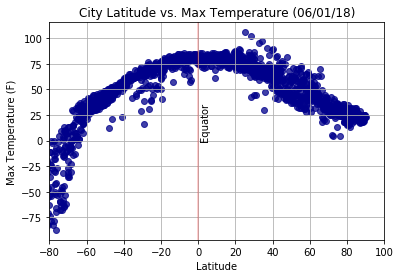

In [22]:
plt.scatter(location_data['Latitude'], location_data['Temperature (F)'], marker='o', facecolor='darkblue',alpha = 0.75)
plt.title("City Latitude vs. Max Temperature (06/01/18)")
plt.axvline(0, color = 'red', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("City_Latitude-VS-Max_Temperature-06-01-18).png")
plt.show()

# Humidity (%) vs. Latitude

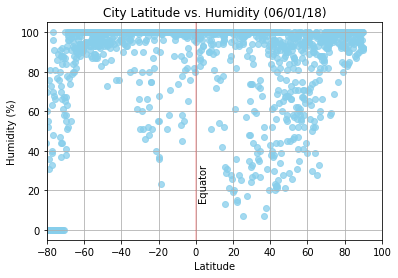

In [39]:
# Humidity (%) vs. Latitude
plt.scatter(location_data['Latitude'],location_data['Humidity'],marker='o',facecolor='skyblue', alpha = 0.75)

plt.title("City Latitude vs. Humidity (06/01/18)")
plt.axvline(0, color = 'red', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Humidity.png")
plt.show()

# Cloudiness (%) vs. Latitude

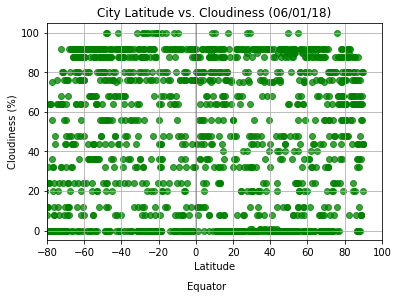

In [41]:
# Cloudiness (%) vs. Latitude
plt.scatter(location_data['Latitude'],location_data['Cloudiness'],marker='o',facecolor='green', alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (06/01/18)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(-5,-30,'Equator')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.savefig("Cloudiness.png")
plt.show()

# Wind Speed (mph) vs. Latitude

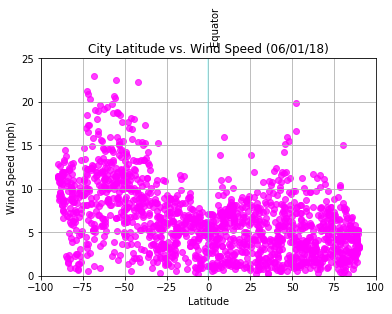

In [32]:
#  Wind Speed (mph) vs. Latitude
plt.scatter(location_data['Latitude'],location_data['Wind Speed'],marker='o',facecolor='magenta', alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (06/01/18)")
plt.axvline(0, color = 'cyan', alpha = .25, label = 'Equator')
plt.text(1,30,'Equator',rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-100,100)
plt.ylim(0,25)
plt.savefig("Wind_Speed.png")
plt.show()